# The Spark Foundataionn: Data Science and business analytics Intership

### Task 6 : Prediction using Decision Tree Algorithm 
### Statement : Create the Decision Tree classifier and visualize it graphically.
### Author : Shivthare Ankita Pradip

In [1]:
# Importing the required Libraries
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 : Import the dataset

In [2]:
data=pd.read_excel("C:/Users/ankit/Downloads/Data II.xlsx")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2 : Exploratory Data Analysis

In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
data.isnull().values.any()

False

In [11]:
# unique value in each columns
for i in data.columns: 
    print(i, "\t\t",len(data[i].unique()))

Id 		 150
SepalLengthCm 		 35
SepalWidthCm 		 23
PetalLengthCm 		 43
PetalWidthCm 		 22
Species 		 3


In [12]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x= data.loc[:, features].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [17]:
y=data.Species
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## Step 3: Data Visualization comparing various features

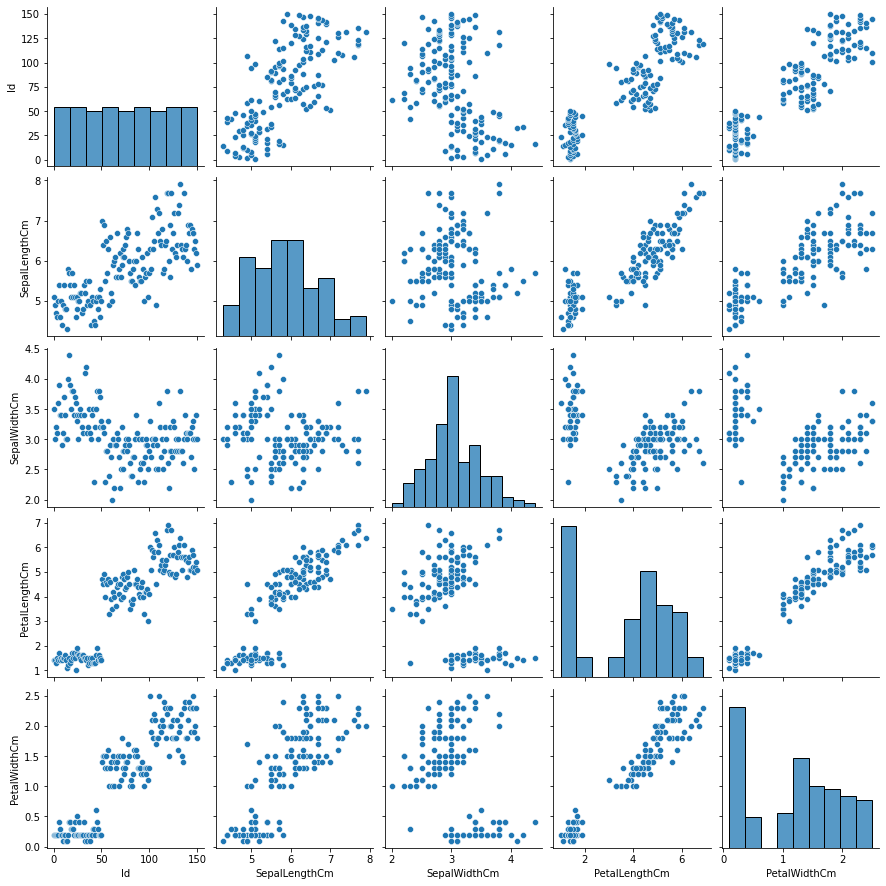

In [18]:
sns.pairplot(data)

Text(0.5, 1.0, 'visualize average,number0f,min,max,std,Queartile')

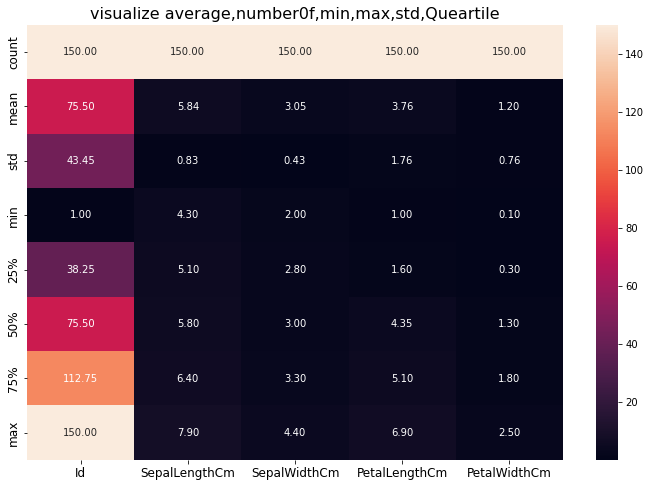

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(data.describe(),annot=True,fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("visualize average,number0f,min,max,std,Queartile",fontsize=16)

In [22]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'visualize average,number0f,min,max,std,Queartile')

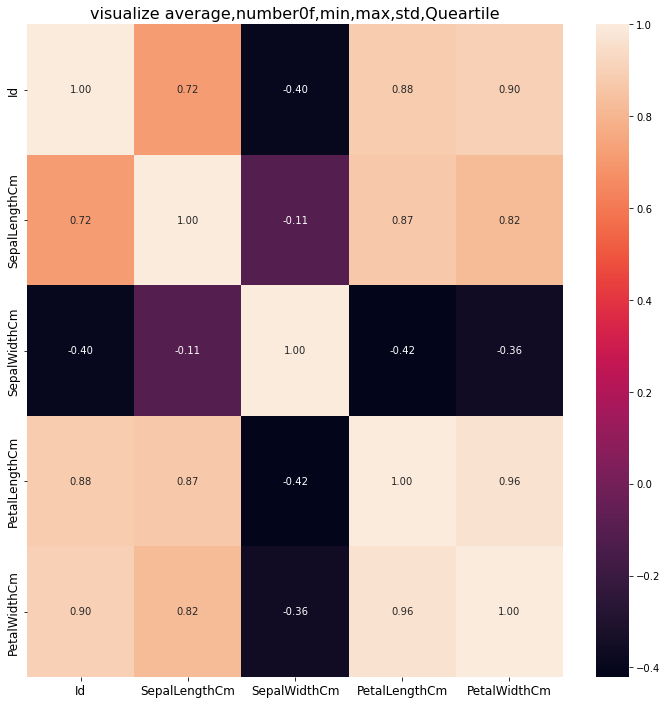

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("visualize average,number0f,min,max,std,Queartile",fontsize=16)

## Step 4: Decision Tree Tree Model Training

In [25]:
# Model Training
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0)
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(x_train, y_train)
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [28]:
from sklearn import preprocessing
data['Specices']=preprocessing.LabelEncoder().fit_transform(data['Species'])

In [29]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
Specices           int32
dtype: object

In [31]:
X=data.iloc[:,1:5].values
Y=data.iloc[:,-1].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)
print("The Decision Tree Classification model trained")

The Decision Tree Classification model trained


In [35]:
classifier_tree=tree.DecisionTreeClassifier()
classifier_tree=classifier_tree.fit(X_train,Y_train)

In [36]:
# text graph representation
text_presentation=tree.export_text(classifier_tree)
print(text_presentation)

|--- feature_3 <= -0.58
|   |--- class: 0
|--- feature_3 >  -0.58
|   |--- feature_3 <= 0.70
|   |   |--- feature_2 <= 0.71
|   |   |   |--- feature_3 <= 0.57
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.57
|   |   |   |   |--- feature_0 <= -0.09
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -0.09
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 2
|   |--- feature_3 >  0.70
|   |   |--- feature_2 <= 0.60
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 2



[Text(446.40000000000003, 797.28, 'X[3] <= -0.579\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(334.8, 652.3199999999999, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(558.0, 652.3199999999999, 'X[3] <= 0.701\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(334.8, 507.35999999999996, 'X[2] <= 0.711\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(223.20000000000002, 362.4, 'X[3] <= 0.573\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(111.60000000000001, 217.43999999999994, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(334.8, 217.43999999999994, 'X[0] <= -0.09\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(223.20000000000002, 72.4799999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.40000000000003, 72.4799999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.40000000000003, 362.4, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(781.2, 507.35999999999996, 'X[2] <= 0.6\ngini = 0.059\nsampl

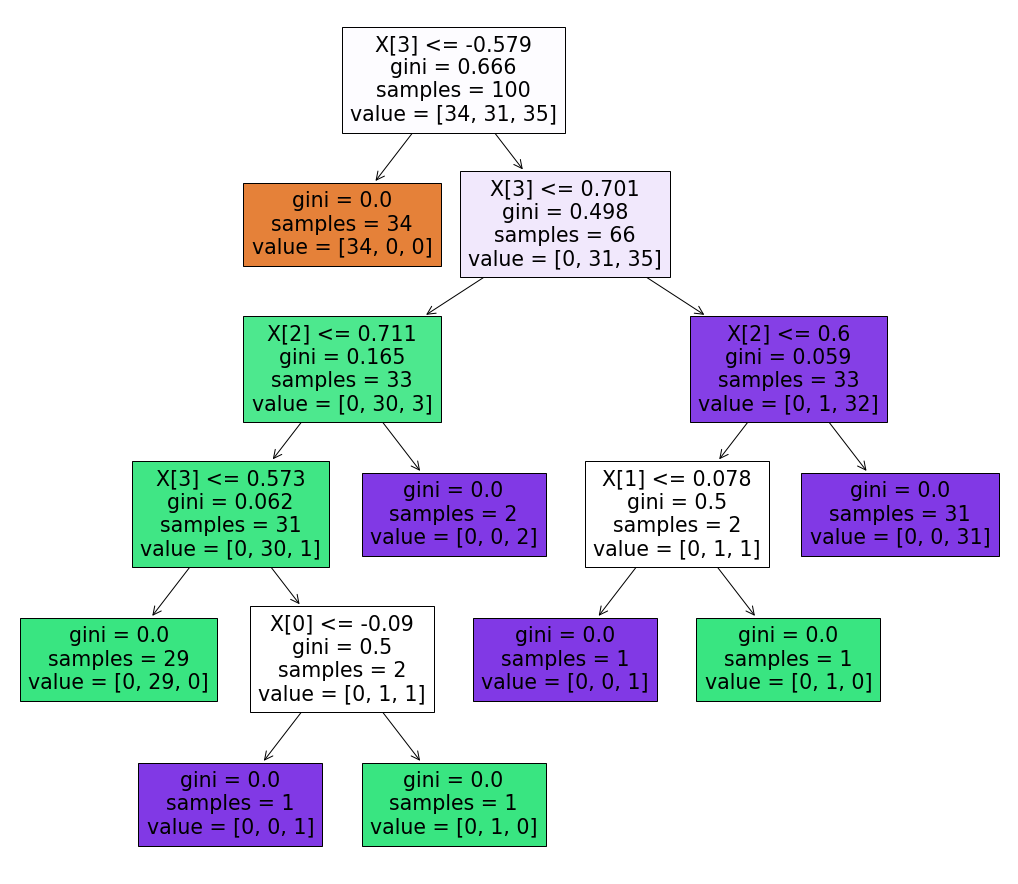

In [37]:
plt.figure(figsize=(18,16))
tree.plot_tree(classifier_tree,filled=True,impurity=True)

## Step 5: Calculating the Model accuracy

In [38]:
y_pred=classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

In [39]:
print("Accuracy score:",np.mean(y_pred==y_test))

Accuracy score: 0.96


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


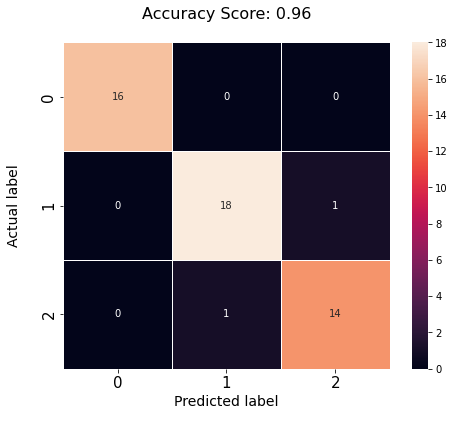

In [41]:
score=np.mean(y_pred==y_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True,fmt='.0f',linewidths=0.5,square= True);
plt.ylabel('Actual label\n',fontsize = 14);
plt.xlabel('Predicted label\n', fontsize = 14);
plt.title('Accuracy Score: {}\n'.format(score),size =16);
plt.tick_params(labelsize= 15)
plt.show()

In [42]:
cm_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of model:",cm_accuracy)

Accuracy of model: 0.96


## Classification Report

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### The classifier model can predict the Species of the flower with 96% Accuracy score.

# Thank You!